In [2]:
from google.cloud import bigquery
from google.cloud.bigquery import magics
%load_ext bigquery_magics

data_set = "testing_set"
project_name = "emerald-entity-468916-f9"

job_config = bigquery.QueryJobConfig(default_dataset = f"{project_name}.{data_set}")
client = bigquery.Client(project = project_name, default_query_job_config = job_config, credentials = globals().get('credentials', None))
magics.context.default_query_job_config = job_config
magics.context.project = project_name

The bigquery_magics extension is already loaded. To reload it, use:
  %reload_ext bigquery_magics


### Frequency distributions

**Gender frequency distribution**

d:\llm\book_crawler\.venv\Lib\site-packages\bigframes\core\log_adapter.py:180: TimeTravelCacheWarning: Reading cached table from 2025-09-21 00:42:12.888594+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  return method(*args, **kwargs)


<Axes: xlabel='sex'>

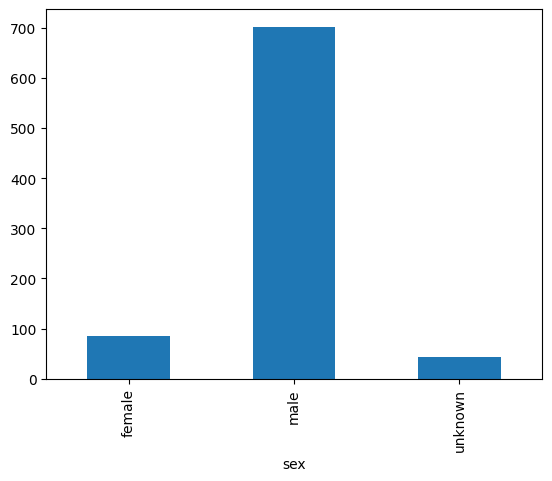

In [34]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched")
characters_count_by = (characters.groupby("sex")["sex"].count())
characters_count_by.plot.bar()

**Wealth frequency distribution**

<Axes: xlabel='wealth_name'>

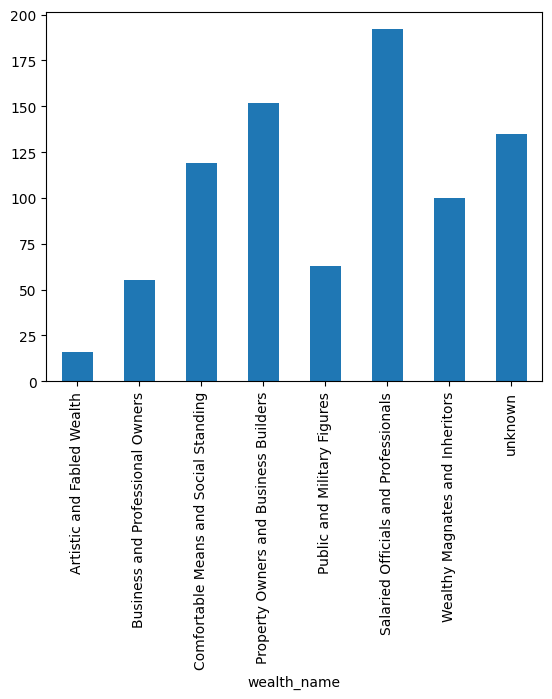

In [33]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched", use_cache=False)
characters_count_by = (characters.groupby("wealth_name")["wealth_name"].count())
characters_count_by.plot.bar()

**Social class frequency distribution**

<Axes: xlabel='social_class_name'>

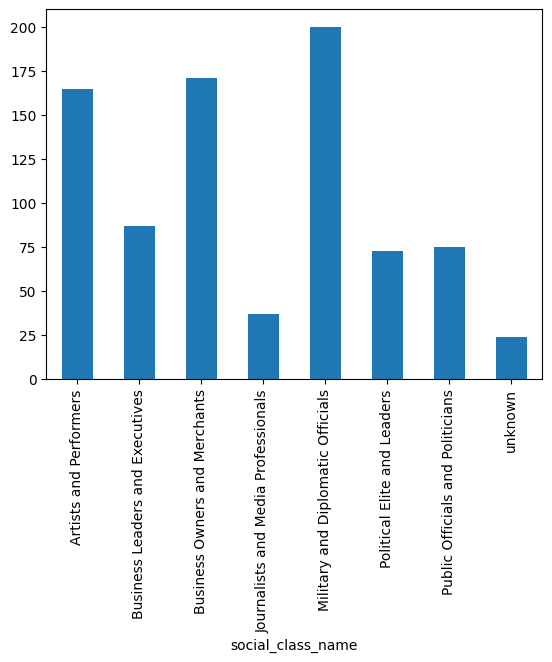

In [32]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched", use_cache=False)
characters_count_by = (characters.groupby("social_class_name")["social_class_name"].count())
characters_count_by.plot.bar()

**Moral values frequency distribution**

<Axes: xlabel='values_name'>

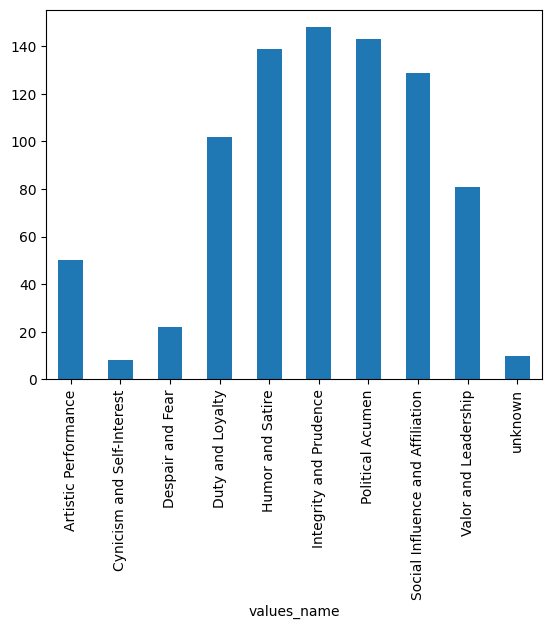

In [30]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_characters_enriched", use_cache=False)
characters_count_by = (characters.groupby("values_name")["values_name"].count())
characters_count_by.plot.bar()

### Relationships analysis

**Analysis of relations between gender and wealth**

<Axes: xlabel='Economic position / income', ylabel='Relative percentage'>

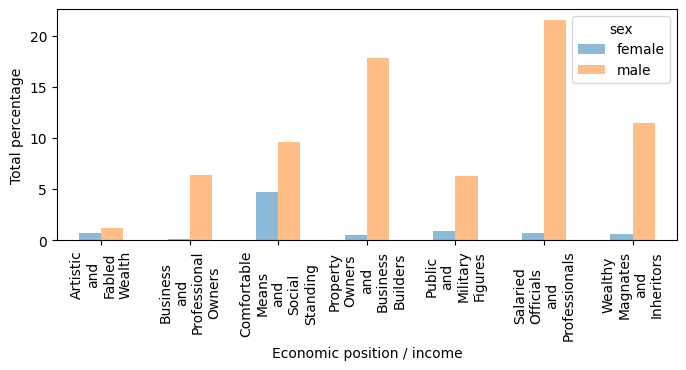

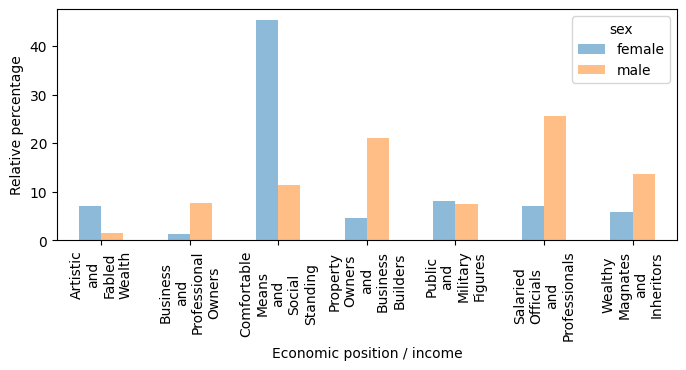

In [40]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_crosstab_sex_wealth", use_cache=False)
characters = characters[(characters['sex'] != 'unknown') & (characters['wealth_name'] != 'unknown')]
characters['wealth_name'] = characters['wealth_name'].str.replace(' ', '\n')

pivot_df = characters.pivot(index='wealth_name', columns='sex', values='total_percentage').fillna(0)
pivot_df.plot.bar(stacked=False, alpha=0.5, figsize=(8, 3), fontsize=10, xlabel="Economic position / income", ylabel="Total percentage")

pivot_df = characters.pivot(index='wealth_name', columns='sex', values='sex_percentage').fillna(0)
pivot_df.plot.bar(stacked=False, alpha=0.5, figsize=(8, 3), fontsize=10, xlabel="Economic position / income", ylabel="Relative percentage")

**Analysis of relations between gender and moral values**

<Axes: xlabel='Core principles and values', ylabel='Relative percentage'>

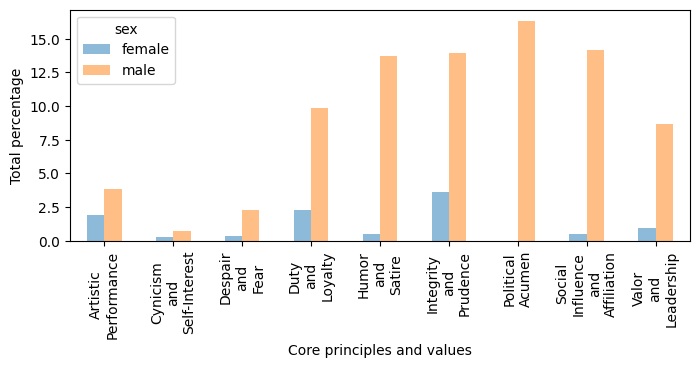

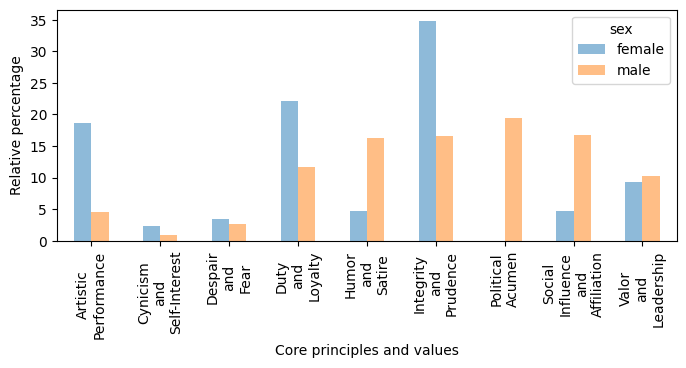

In [38]:
import bigframes.pandas as bpd

characters = bpd.read_gbq(f"{project_name}.{data_set}.v_crosstab_sex_values", use_cache=False)
characters = characters[(characters['sex'] != 'unknown') & (characters['values_name'] != 'unknown')]
characters['values_name'] = characters['values_name'].str.replace(' ', '\n')

pivot_df = characters.pivot(index='values_name', columns='sex', values='total_percentage').fillna(0)
pivot_df.plot.bar(stacked=False, alpha=0.5, figsize=(8, 3), fontsize=10, xlabel="Core principles and values", ylabel="Total percentage")

pivot_df = characters.pivot(index='values_name', columns='sex', values='sex_percentage').fillna(0)
pivot_df.plot.bar(stacked=False, alpha=0.5, figsize=(8, 3), fontsize=10, xlabel="Core principles and values", ylabel="Relative percentage")